# Experiment: Comparing different sampling parameters for training

In [4]:
using Revise, QARBoM, DWave, DataFrames, CSV

In [5]:
MOI = QARBoM.QUBO.ToQUBO.MOI
MOI.supports(::DWave.Neal.Optimizer, ::MOI.ObjectiveSense) = true

In [6]:
df = DataFrame(CSV.File(raw"./converted_bool_only.csv"))

x_train = Vector{Vector{Int}}()

for row in eachrow(df)
    push!(x_train, collect(row))
end

In [7]:
learning_rate = 0.0002

0.0002

In [8]:
num_sweeps = [i for i in 1:25:101]
num_reads = [i for i in 1:25:101]

5-element Vector{Int64}:
   1
  26
  51
  76
 101

In [9]:
W = rand(22,10)

22×10 Matrix{Float64}:
 0.570074   0.493086   0.591664   …  0.574687   0.77179    0.356031
 0.986634   0.340908   0.0207952     0.346979   0.0531842  0.288253
 0.2717     0.372524   0.633049      0.982804   0.866281   0.199509
 0.397607   0.87998    0.202758      0.463339   0.0584551  0.55752
 0.469721   0.730235   0.958628      0.419671   0.539639   0.875062
 0.0877029  0.137045   0.0105974  …  0.978552   0.38676    0.69426
 0.697047   0.513686   0.17508       0.210733   0.0914794  0.578076
 0.480369   0.0819686  0.8963        0.0022234  0.980089   0.0232053
 0.377413   0.283734   0.785505      0.553726   0.540486   0.0372298
 0.0217372  0.464768   0.849927      0.665671   0.483587   0.673695
 0.49869    0.323879   0.974177   …  0.207841   0.86932    0.581832
 0.482846   0.271789   0.229018      0.465202   0.203044   0.10048
 0.111612   0.299579   0.290845      0.999726   0.326131   0.948759
 0.377981   0.190936   0.336551      0.87175    0.441026   0.946137
 0.733722   0.748574   0.5

In [10]:
all_mse = []

Any[]

In [11]:
for nr in num_reads
    for ns in num_sweeps
        rbm = QARBoM.QUBORBM(22,10, W, DWave.Neal.Optimizer)
        MOI.set(rbm.model, MOI.RawOptimizerAttribute("num_reads"), nr)
        MOI.set(rbm.model, MOI.RawOptimizerAttribute("num_sweeps"), ns)
    
        println()
        println("Reads $(nr) | Sweeps $(ns)") 
        println()
    
        mse = QARBoM.train_persistent_qubo(rbm, x_train[1:10000];n_samples = 1, batch_size = 10, n_epochs = 50, 
            learning_rate = [learning_rate for i in 1:50])
    
        push!(all_mse, mse)
    end
end


Reads 1 | Sweeps 1

Setting mini-batches
Starting training
|------------------------------------------------------------------------------|
| Epoch |    MSE    | Time (Sample) | Time (Qsamp) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|     1 |   15.3777 |        0.0125 |       9.0093 |        1.8832 |   10.9050 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    MSE    | Time (Sample) | Time (Qsamp) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|     2 |   11.2648 |        0.0124 |       3.0140 |        1.1404 |   15.0718 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    MSE    | Time (Sample) | Time (Qsamp

In [12]:
df = DataFrame()
i = 1
for nr in num_reads
    for ns in num_sweeps
        df[!,"r_$(nr)_s_$(ns)"] =  all_mse[i]
        i += 1
    end
end
df

Row,r_1_s_1,r_1_s_26,r_1_s_51,r_1_s_76,r_1_s_101,r_26_s_1,r_26_s_26,r_26_s_51,r_26_s_76,r_26_s_101,r_51_s_1,r_51_s_26,r_51_s_51,r_51_s_76,r_51_s_101,r_76_s_1,r_76_s_26,r_76_s_51,r_76_s_76,r_76_s_101,r_101_s_1,r_101_s_26,r_101_s_51,r_101_s_76,r_101_s_101
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,15.3777,15.3609,15.3609,15.3609,15.3609,15.4599,15.3609,15.3609,15.3609,15.3609,15.5125,15.3609,15.3609,15.3609,15.3609,15.5413,15.3609,15.3609,15.3609,15.3609,15.575,15.3609,15.3609,15.3609,15.3609
2,11.2648,10.9563,10.9562,10.9563,10.9563,11.6733,10.9562,10.9562,10.9562,10.9562,11.8663,10.9561,10.9561,10.9561,10.9562,11.9769,10.9561,10.9561,10.9561,10.9561,12.0917,10.9561,10.9561,10.9561,10.9561
3,6.60392,6.0145,6.01468,6.01289,6.01337,6.85338,5.9934,5.99674,5.99665,5.99805,7.02152,5.98969,5.99286,5.9934,5.99457,7.12873,5.98686,5.9903,5.99226,5.99319,7.24999,5.98668,5.98982,5.99108,5.99253
4,4.61479,4.28064,4.28975,4.2898,4.29472,4.6816,4.20273,4.21427,4.21852,4.22128,4.73051,4.191,4.20321,4.20852,4.21199,4.7629,4.18463,4.19702,4.20381,4.20797,4.79664,4.18165,4.19498,4.20095,4.20602
5,4.12529,3.9572,3.96684,3.96802,3.9699,4.11975,3.84038,3.85117,3.85796,3.86312,4.13728,3.82662,3.83766,3.84447,3.84865,4.14717,3.81865,3.82971,3.83715,3.84207,4.15646,3.81283,3.82572,3.83371,3.8398
6,3.97823,3.85546,3.86774,3.86912,3.87054,3.91706,3.70566,3.71491,3.72282,3.72652,3.9243,3.69313,3.70405,3.71116,3.7155,3.92782,3.68267,3.69856,3.70365,3.70937,3.93147,3.67541,3.69313,3.70028,3.70502
7,3.92387,3.83224,3.84091,3.84739,3.84614,3.81652,3.62308,3.62543,3.63025,3.63246,3.81802,3.61643,3.624,3.62903,3.63129,3.81903,3.60835,3.62289,3.62566,3.62985,3.81903,3.60135,3.6211,3.6262,3.62686
8,3.90727,3.83681,3.84303,3.84834,3.84807,3.75946,3.55539,3.55398,3.55631,3.55524,3.75592,3.55318,3.55659,3.55762,3.55855,3.75483,3.54783,3.55854,3.55874,3.56112,3.75208,3.54207,3.55863,3.5615,3.56067
9,3.90785,3.8477,3.8563,3.86248,3.86262,3.72002,3.50406,3.50356,3.50415,3.50411,3.71322,3.50147,3.50358,3.50614,3.50673,3.71011,3.49528,3.50587,3.50681,3.51044,3.70619,3.49013,3.50593,3.51021,3.50988


In [13]:
CSV.write("benchmark_dwave_parameters.csv", df)

"benchmark_dwave_parameters.csv"

In [14]:
using Plots

In [15]:
df_loaded = DataFrame(CSV.File("benchmark_dwave_parameters.csv"))

Row,r_1_s_1,r_1_s_26,r_1_s_51,r_1_s_76,r_1_s_101,r_26_s_1,r_26_s_26,r_26_s_51,r_26_s_76,r_26_s_101,r_51_s_1,r_51_s_26,r_51_s_51,r_51_s_76,r_51_s_101,r_76_s_1,r_76_s_26,r_76_s_51,r_76_s_76,r_76_s_101,r_101_s_1,r_101_s_26,r_101_s_51,r_101_s_76,r_101_s_101
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,15.3777,15.3609,15.3609,15.3609,15.3609,15.4599,15.3609,15.3609,15.3609,15.3609,15.5125,15.3609,15.3609,15.3609,15.3609,15.5413,15.3609,15.3609,15.3609,15.3609,15.575,15.3609,15.3609,15.3609,15.3609
2,11.2648,10.9563,10.9562,10.9563,10.9563,11.6733,10.9562,10.9562,10.9562,10.9562,11.8663,10.9561,10.9561,10.9561,10.9562,11.9769,10.9561,10.9561,10.9561,10.9561,12.0917,10.9561,10.9561,10.9561,10.9561
3,6.60392,6.0145,6.01468,6.01289,6.01337,6.85338,5.9934,5.99674,5.99665,5.99805,7.02152,5.98969,5.99286,5.9934,5.99457,7.12873,5.98686,5.9903,5.99226,5.99319,7.24999,5.98668,5.98982,5.99108,5.99253
4,4.61479,4.28064,4.28975,4.2898,4.29472,4.6816,4.20273,4.21427,4.21852,4.22128,4.73051,4.191,4.20321,4.20852,4.21199,4.7629,4.18463,4.19702,4.20381,4.20797,4.79664,4.18165,4.19498,4.20095,4.20602
5,4.12529,3.9572,3.96684,3.96802,3.9699,4.11975,3.84038,3.85117,3.85796,3.86312,4.13728,3.82662,3.83766,3.84447,3.84865,4.14717,3.81865,3.82971,3.83715,3.84207,4.15646,3.81283,3.82572,3.83371,3.8398
6,3.97823,3.85546,3.86774,3.86912,3.87054,3.91706,3.70566,3.71491,3.72282,3.72652,3.9243,3.69313,3.70405,3.71116,3.7155,3.92782,3.68267,3.69856,3.70365,3.70937,3.93147,3.67541,3.69313,3.70028,3.70502
7,3.92387,3.83224,3.84091,3.84739,3.84614,3.81652,3.62308,3.62543,3.63025,3.63246,3.81802,3.61643,3.624,3.62903,3.63129,3.81903,3.60835,3.62289,3.62566,3.62985,3.81903,3.60135,3.6211,3.6262,3.62686
8,3.90727,3.83681,3.84303,3.84834,3.84807,3.75946,3.55539,3.55398,3.55631,3.55524,3.75592,3.55318,3.55659,3.55762,3.55855,3.75483,3.54783,3.55854,3.55874,3.56112,3.75208,3.54207,3.55863,3.5615,3.56067
9,3.90785,3.8477,3.8563,3.86248,3.86262,3.72002,3.50406,3.50356,3.50415,3.50411,3.71322,3.50147,3.50358,3.50614,3.50673,3.71011,3.49528,3.50587,3.50681,3.51044,3.70619,3.49013,3.50593,3.51021,3.50988


In [16]:
# df_to_plot = select!(df_loaded, Not(["0.0005", "0.0007", "0.0008", "0.0009", "0.001"]))
# df_to_plot = select!(df_loaded, Not(["0.0002", "0.0003", "0.0004", "0.0006", "0.0007", "0.0008", "0.001"]))
df_to_plot = df_loaded

Row,r_1_s_1,r_1_s_26,r_1_s_51,r_1_s_76,r_1_s_101,r_26_s_1,r_26_s_26,r_26_s_51,r_26_s_76,r_26_s_101,r_51_s_1,r_51_s_26,r_51_s_51,r_51_s_76,r_51_s_101,r_76_s_1,r_76_s_26,r_76_s_51,r_76_s_76,r_76_s_101,r_101_s_1,r_101_s_26,r_101_s_51,r_101_s_76,r_101_s_101
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,15.3777,15.3609,15.3609,15.3609,15.3609,15.4599,15.3609,15.3609,15.3609,15.3609,15.5125,15.3609,15.3609,15.3609,15.3609,15.5413,15.3609,15.3609,15.3609,15.3609,15.575,15.3609,15.3609,15.3609,15.3609
2,11.2648,10.9563,10.9562,10.9563,10.9563,11.6733,10.9562,10.9562,10.9562,10.9562,11.8663,10.9561,10.9561,10.9561,10.9562,11.9769,10.9561,10.9561,10.9561,10.9561,12.0917,10.9561,10.9561,10.9561,10.9561
3,6.60392,6.0145,6.01468,6.01289,6.01337,6.85338,5.9934,5.99674,5.99665,5.99805,7.02152,5.98969,5.99286,5.9934,5.99457,7.12873,5.98686,5.9903,5.99226,5.99319,7.24999,5.98668,5.98982,5.99108,5.99253
4,4.61479,4.28064,4.28975,4.2898,4.29472,4.6816,4.20273,4.21427,4.21852,4.22128,4.73051,4.191,4.20321,4.20852,4.21199,4.7629,4.18463,4.19702,4.20381,4.20797,4.79664,4.18165,4.19498,4.20095,4.20602
5,4.12529,3.9572,3.96684,3.96802,3.9699,4.11975,3.84038,3.85117,3.85796,3.86312,4.13728,3.82662,3.83766,3.84447,3.84865,4.14717,3.81865,3.82971,3.83715,3.84207,4.15646,3.81283,3.82572,3.83371,3.8398
6,3.97823,3.85546,3.86774,3.86912,3.87054,3.91706,3.70566,3.71491,3.72282,3.72652,3.9243,3.69313,3.70405,3.71116,3.7155,3.92782,3.68267,3.69856,3.70365,3.70937,3.93147,3.67541,3.69313,3.70028,3.70502
7,3.92387,3.83224,3.84091,3.84739,3.84614,3.81652,3.62308,3.62543,3.63025,3.63246,3.81802,3.61643,3.624,3.62903,3.63129,3.81903,3.60835,3.62289,3.62566,3.62985,3.81903,3.60135,3.6211,3.6262,3.62686
8,3.90727,3.83681,3.84303,3.84834,3.84807,3.75946,3.55539,3.55398,3.55631,3.55524,3.75592,3.55318,3.55659,3.55762,3.55855,3.75483,3.54783,3.55854,3.55874,3.56112,3.75208,3.54207,3.55863,3.5615,3.56067
9,3.90785,3.8477,3.8563,3.86248,3.86262,3.72002,3.50406,3.50356,3.50415,3.50411,3.71322,3.50147,3.50358,3.50614,3.50673,3.71011,3.49528,3.50587,3.50681,3.51044,3.70619,3.49013,3.50593,3.51021,3.50988


In [17]:
plot(Matrix(df_to_plot), labels=permutedims(string.(names(df_to_plot))), linewidth=2, botton_margin=0, right_margin = 3Plots.mm)
# plot(range(1,50, length = 50), all_mse[2],label = "ϵ = 0.002")
theme(:wong)


lens!([45, 50], [1.7, 2], inset = (1, bbox(0.3, 0.0, 0.2, 0.2)), subplot=2)


xlabel!("Epoch", subplot =1)
ylabel!("Mean Squared Error", subplot =1 )

plot!(legend=:outerbottom, legendcolumns=3)

savefig("errors.pdf")

"/Users/pripper/Documents/GitHub/RBM/example/errors.pdf"

In [18]:
df_loaded[50, "r_1_s_76"]

4.685273389388443

In [19]:
i = 1
j = 1
matrix_end = zeros(5,5)
for nr in num_reads
    for ns in num_sweeps
        matrix_end[i,j] = df_loaded[50, "r_$(nr)_s_$(ns)"]
        j += 1
    end
    j = 1
    i += 1
end
matrix_end

5×5 Matrix{Float64}:
 4.72596  4.69203  4.68575  4.68527  4.68491
 3.32462  3.08165  3.11406  3.12911  3.14393
 3.27052  3.051    3.04753  3.07487  3.08574
 3.24497  3.03759  3.05329  3.04069  3.07499
 3.223    3.00636  3.04103  3.03292  3.06656

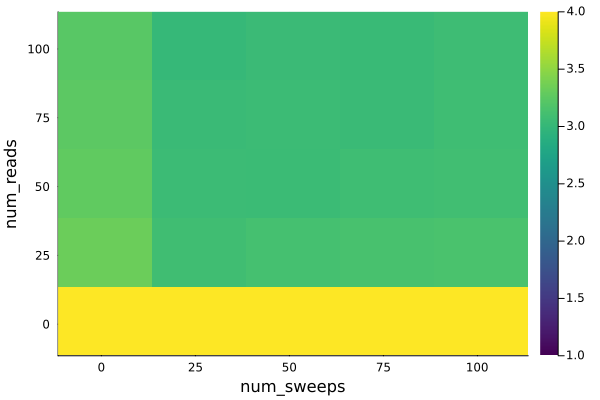

In [20]:
heatmap((1:25:101), (1:25:101), matrix_end, clims=(1, 4))
xlabel!("num_sweeps")
ylabel!("num_reads")